In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style()
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [4]:
data=pd.read_csv("pricing.csv")
data

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422
...,...,...,...,...,...,...,...,...,...,...
995,33,23,Urban,Gold,24,4.21,Morning,Premium,11,91.389526
996,84,29,Urban,Regular,92,4.55,Morning,Premium,94,424.155987
997,44,6,Suburban,Gold,80,4.13,Night,Premium,40,157.364830
998,53,27,Suburban,Regular,78,3.63,Night,Premium,58,279.095048


In [5]:
data.describe()

,Number_of_Riders,Number_of_Drivers,Number_of_Past_Rides,Average_Ratings,Expected_Ride_Duration,Historical_Cost_of_Ride
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,60.372000,27.076000,50.031000,4.257220,99.58800,372.502623
std,23.701506,19.068346,29.313774,0.435781,49.16545,187.158756
min,20.000000,5.000000,0.000000,3.500000,10.00000,25.993449
25%,40.000000,11.000000,25.000000,3.870000,59.75000,221.365202
50%,60.000000,22.000000,51.000000,4.270000,102.00000,362.019426
75%,81.000000,38.000000,75.000000,4.632500,143.00000,510.497504
max,100.000000,89.000000,100.000000,5.000000,180.00000,836.116419


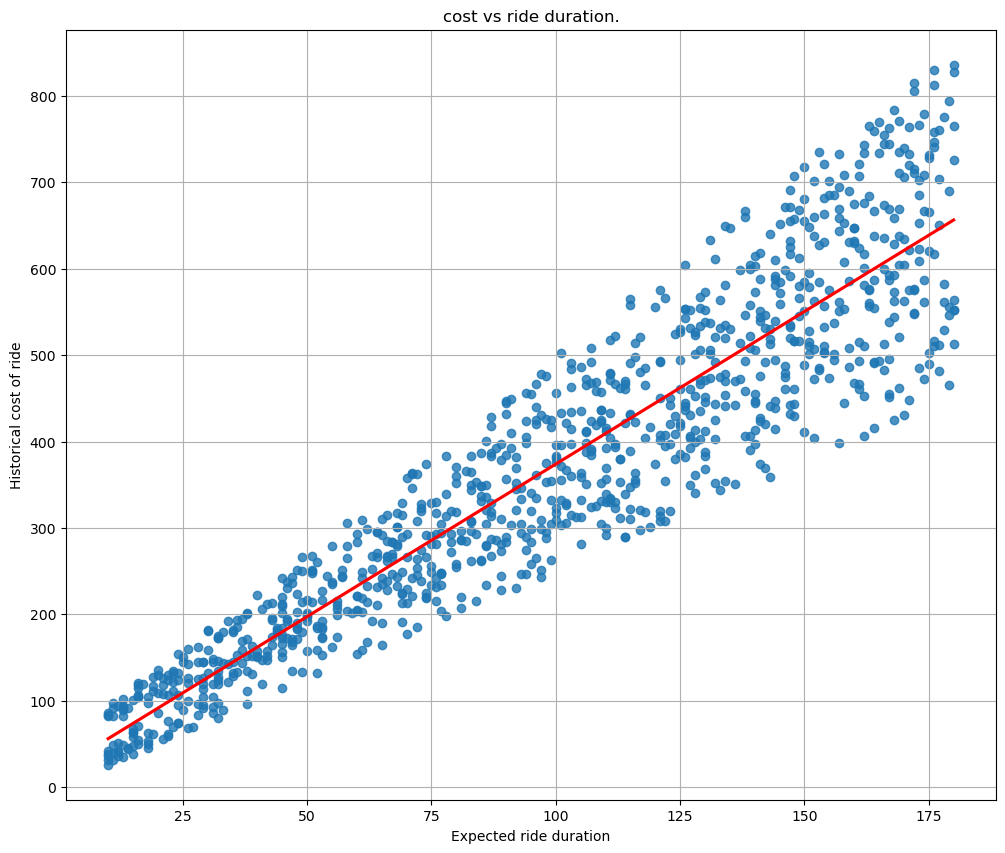

In [21]:
plt.figure(figsize=(12,10))
sns.regplot(data=data,x="Expected_Ride_Duration",y="Historical_Cost_of_Ride",ci=None,line_kws={"color":"red"})
plt.title("cost vs ride duration.")
plt.xlabel("Expected ride duration")
plt.ylabel("Historical cost of ride")
plt.grid()
plt.show()
# Rides with higher ride duration tend to cost more

Text(0.5, 1.0, 'car type vs cost.')

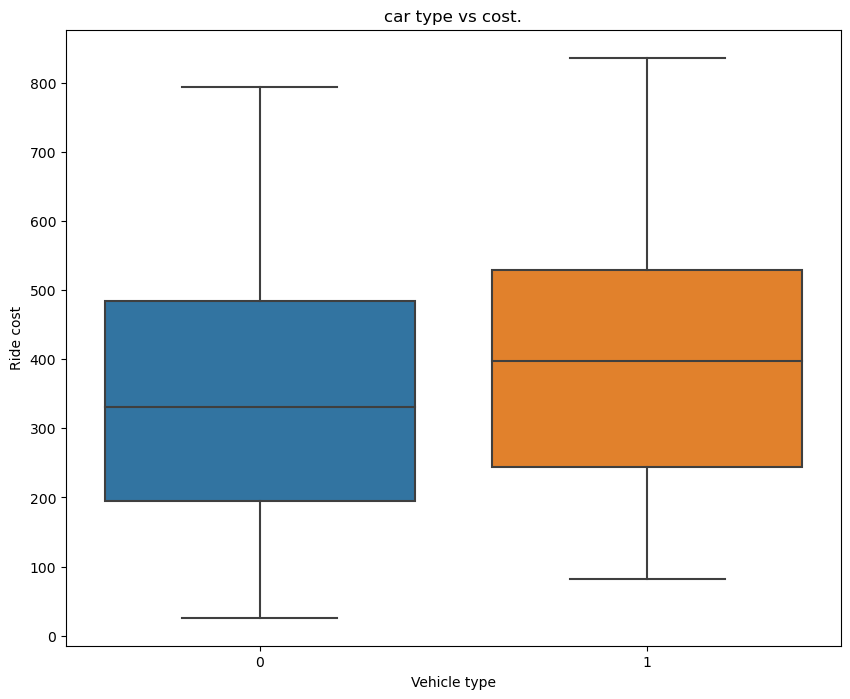

In [25]:
plt.figure(figsize=(10,8))
sns.boxplot(data=data,x="Vehicle_Type",y="Historical_Cost_of_Ride")
plt.xlabel("Vehicle type")
plt.ylabel("Ride cost")
plt.title("car type vs cost.")

C:\Users\DELL\AppData\Local\Temp\ipykernel_2236\2756422285.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



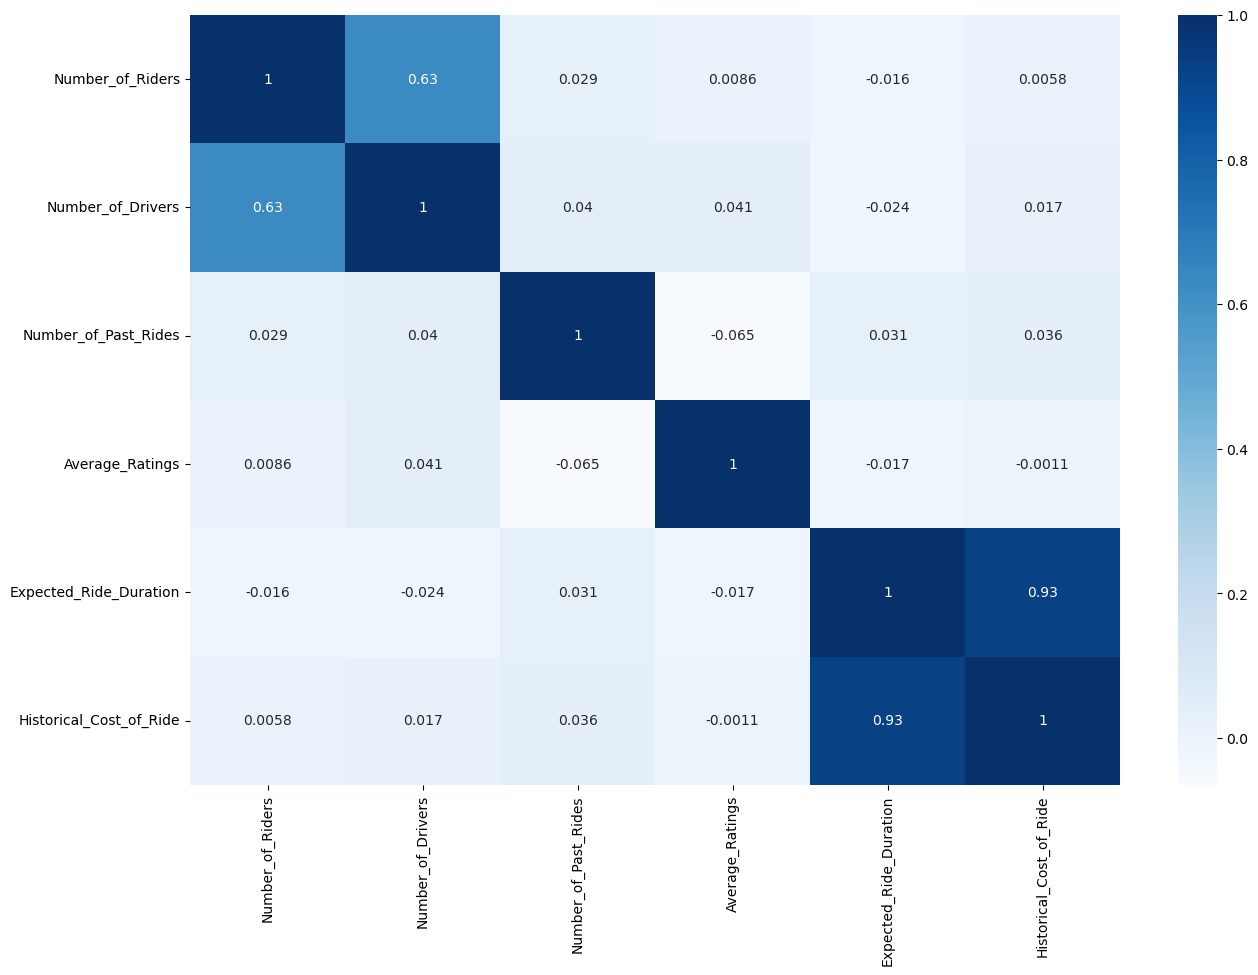

In [8]:
plt.figure(figsize=(15,10))

sns.heatmap(data.corr(),annot=True,cmap="Blues")

plt.savefig("Correlation matrix.")

Implementing the dynamic pricing strategy to adjust ride cost dynamically based on demmand and supply levels.

In [26]:
high_demand_percentile=75
low_demand_percentile=25

# Demand multiplier.
data["demand_multiplier"]=np.where(data["Number_of_Riders"] > np.percentile(data["Number_of_Riders"],high_demand_percentile),
                                   data["Number_of_Riders"] / np.percentile(data["Number_of_Riders"],high_demand_percentile),
                                   data["Number_of_Riders"] / np.percentile(data["Number_of_Riders"],low_demand_percentile))

high_demand_percentile_value = np.percentile(data["Number_of_Riders"], high_demand_percentile)
low_demand_percentile_value=np.percentile(data["Number_of_Riders"],low_demand_percentile)

print("High rider demand:",high_demand_percentile_value)
print("Low rider demand:",low_demand_percentile_value)

# Supply multiplier.
high_supply_percentile=75
low_supply_percentile=25
data["supply_multiplier"]=np.where(data["Number_of_Drivers"] > np.percentile(data["Number_of_Drivers"],low_supply_percentile),
                                   np.percentile(data["Number_of_Drivers"],high_supply_percentile) / data["Number_of_Drivers"],
                                   np.percentile(data["Number_of_Drivers"],low_supply_percentile) /data["Number_of_Drivers"])

high_supply_percentile_value=np.percentile(data["Number_of_Drivers"],high_supply_percentile)
low_supply_percentile_value=np.percentile(data["Number_of_Drivers"],low_supply_percentile)

print("High supply demand:",high_supply_percentile_value)
print("Low supply demand:",low_supply_percentile_value)

#Defining price adjusment factors for high and low demand and supply.
demand_threshold_high= 1.2
demand_threshold_low=0.8
supply_threshold_high=0.8
supply_threshold_low=1.2

# Calculating adjusted ride cost for dynamic pricing.
data["adjusted_ride_cost"]=data["Historical_Cost_of_Ride"] *(np.maximum(data["demand_multiplier"],demand_threshold_low)
                                                             *np.maximum(data["supply_multiplier"],supply_threshold_high))


data

High rider demand: 81.0
Low rider demand: 40.0
High supply demand: 38.0
Low supply demand: 11.0


,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride,demand_multiplier,supply_multiplier,adjusted_ride_cost,profit_percentage
0,90,45,Urban,Silver,13,4.47,Night,1,90,284.257273,1.111111,0.844444,266.710528,-6.172840
1,58,39,Suburban,Silver,72,4.06,Evening,0,43,173.874753,1.450000,0.974359,245.653817,41.282051
2,42,31,Rural,Silver,0,3.99,Afternoon,1,76,329.795469,1.050000,1.225806,424.478684,28.709677
3,89,28,Rural,Regular,67,4.31,Afternoon,1,134,470.201232,1.098765,1.357143,701.155452,49.118166
4,78,22,Rural,Regular,74,3.77,Afternoon,0,149,579.681422,1.950000,1.727273,1952.472427,236.818182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,33,23,Urban,Gold,24,4.21,Morning,1,11,91.389526,0.825000,1.652174,124.567897,36.304348
996,84,29,Urban,Regular,92,4.55,Morning,1,94,424.155987,1.037037,1.310345,576.375440,35.887612
997,44,6,Suburban,Gold,80,4.13,Night,1,40,157.364830,1.100000,1.833333,317.352408,101.666667
998,53,27,Suburban,Regular,78,3.63,Night,1,58,279.095048,1.325000,1.407407,520.460581,86.481481


In [27]:
# Percentage profit.
data["profit_percentage"]=((data["adjusted_ride_cost"]-data["Historical_Cost_of_Ride"])/data["Historical_Cost_of_Ride"]) * 100

# Trying to identify profitable rides.

profitable_rides=data[data["profit_percentage"] > 0]
loss_rides=data[data["profit_percentage"]<0 ]

print(profitable_rides)
print(loss_rides)

     Number_of_Riders  Number_of_Drivers Location_Category  \
1                  58                 39          Suburban   
2                  42                 31             Rural   
3                  89                 28             Rural   
4                  78                 22             Rural   
5                  59                 35             Urban   
..                ...                ...               ...   
995                33                 23             Urban   
996                84                 29             Urban   
997                44                  6          Suburban   
998                53                 27          Suburban   
999                78                 63             Rural   

    Customer_Loyalty_Status  Number_of_Past_Rides  Average_Ratings  \
1                    Silver                    72             4.06   
2                    Silver                     0             3.99   
3                   Regular                  

In [12]:
profitable_count=len(profitable_rides)
loss_count=len(loss_rides)

print("Profitable rides:",profitable_count)
print("Loss rides:",loss_count)

Profitable rides: 826
Loss rides: 173


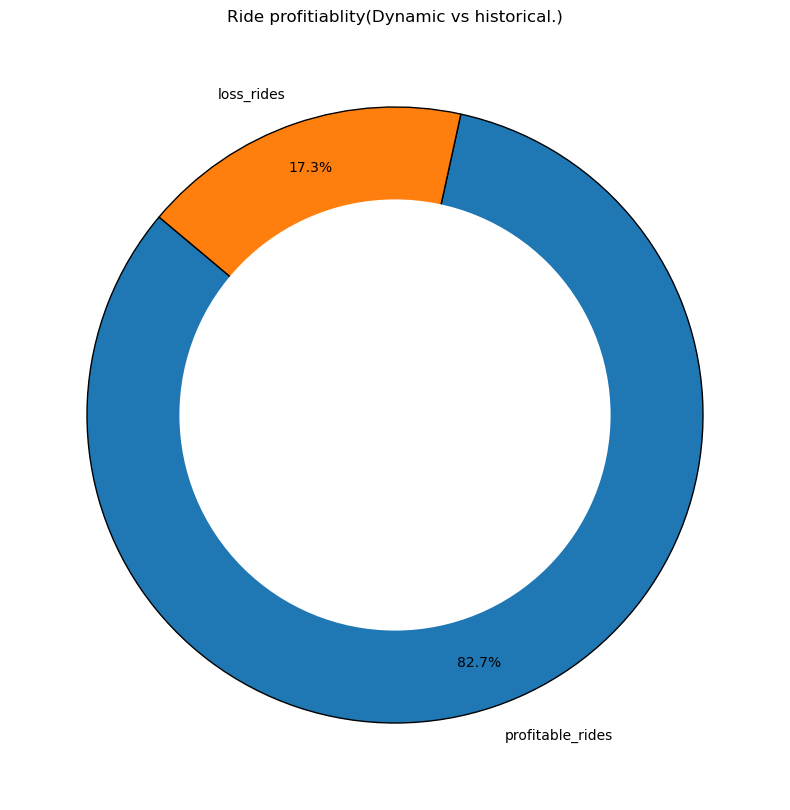

In [29]:
labels = ["profitable_rides", "loss_rides"]
values = [profitable_count, loss_count]

plt.figure(figsize=(12,10))
plt.pie(values,labels=labels,autopct="%1.1f%%",startangle=140,wedgeprops={"edgecolor":"black"},pctdistance=0.85)

centre_circle=plt.Circle((0,0),0.70,fc="white")
fig=plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title("Ride profitiablity(Dynamic vs historical.)")
plt.show()

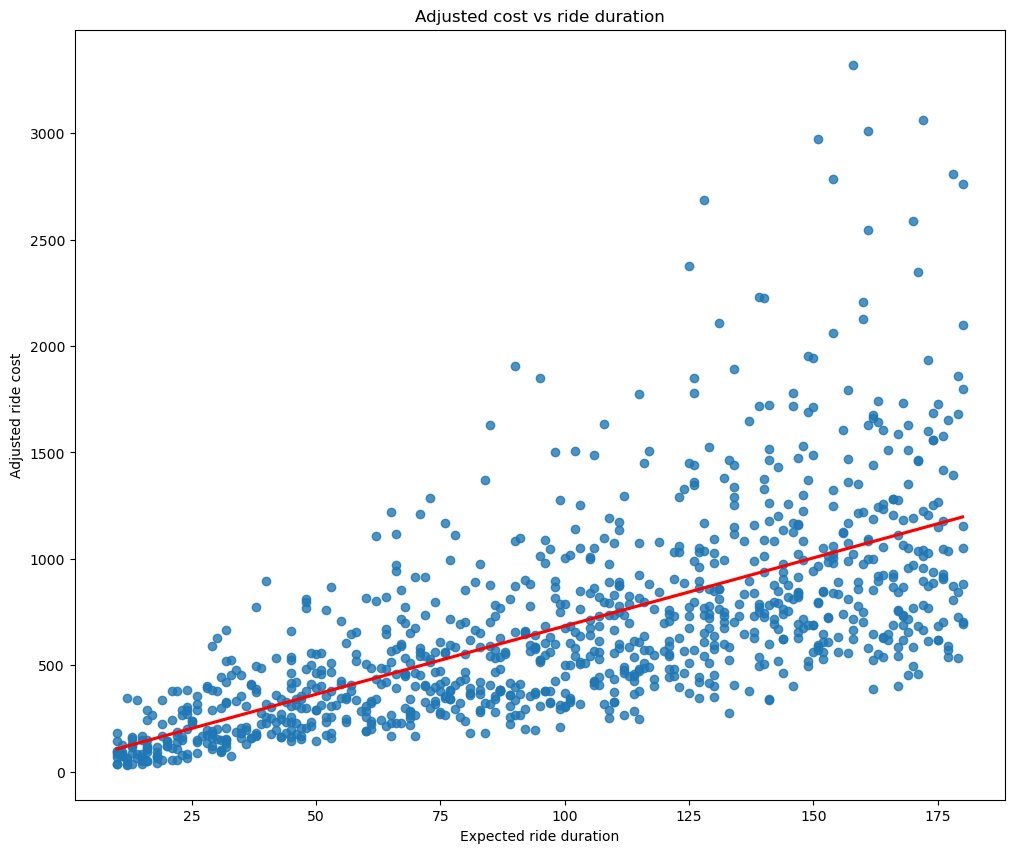

In [30]:
plt.figure(figsize=(12,10))
sns.regplot(data=data,x="Expected_Ride_Duration",y="adjusted_ride_cost",ci=None,line_kws={"color":"red"})
plt.title("Adjusted cost vs ride duration")
plt.xlabel("Expected ride duration")
plt.ylabel("Adjusted ride cost")
plt.show()

In [15]:
def data_pipeline(data):
    numeric_features=data.select_dtypes(include=["float","int"]).columns
    categorical_features=data.select.dtypes(include=["object"]).columns
    data[numeric_features]=data[numeric_features].fillna(data[numeric_features].mean())
    for feature in numeric_features:
        Q1=data[feature].quantile(0.25)
        Q3=data[feature].quantile(0.75)
        IQR=Q3-Q1
        lower_bound=Q1-(1.5 * IQR)
        upper_bound=Q3-(1.5 * IQR)

        data[feature]=np.where((data[feature] < lower_bound) | (data[feature] > upper_bound),
                               data([feature].mean(),data[feature]))
        
        data[categorical_features]=data[categorical_features].fillna(data[categorical_features].mode().iloc[0])

In [16]:
data["Vehicle_Type"]=data["Vehicle_Type"].map({"Premium":1,"Economy":0})

In [17]:
x = np.array(data[["Number_of_Riders", "Number_of_Drivers", "Vehicle_Type", "Expected_Ride_Duration"]])
y = np.array(data[["adjusted_ride_cost"]])

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

y_train = y_train.ravel()
y_test = y_test.ravel()

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train, y_train)



RandomForestRegressor()

In [18]:
def get_vehicle_type_numeric(vehicle_type):
    vehicle_type_mapping = {
        "Premium": 1,
        "Economy": 0
    }
    vehicle_type_numeric = vehicle_type_mapping.get(vehicle_type)
    return vehicle_type_numeric
  

In [19]:
def predict_price(number_of_riders, number_of_drivers, vehicle_type, Expected_Ride_Duration):
    vehicle_type_numeric = get_vehicle_type_numeric(vehicle_type)
    if vehicle_type_numeric is None:
        raise ValueError("Invalid vehicle type")
    
    input_data = np.array([[number_of_riders, number_of_drivers, vehicle_type_numeric, Expected_Ride_Duration]])
    predicted_price = model.predict(input_data)
    return predicted_price

# Example prediction using user input values
user_number_of_riders = 50
user_number_of_drivers = 25
user_vehicle_type = "Economy"
Expected_Ride_Duration = 30
predicted_price = predict_price(user_number_of_riders, user_number_of_drivers, user_vehicle_type, Expected_Ride_Duration)
print("Predicted price:", predicted_price)

Predicted price: [254.65585812]


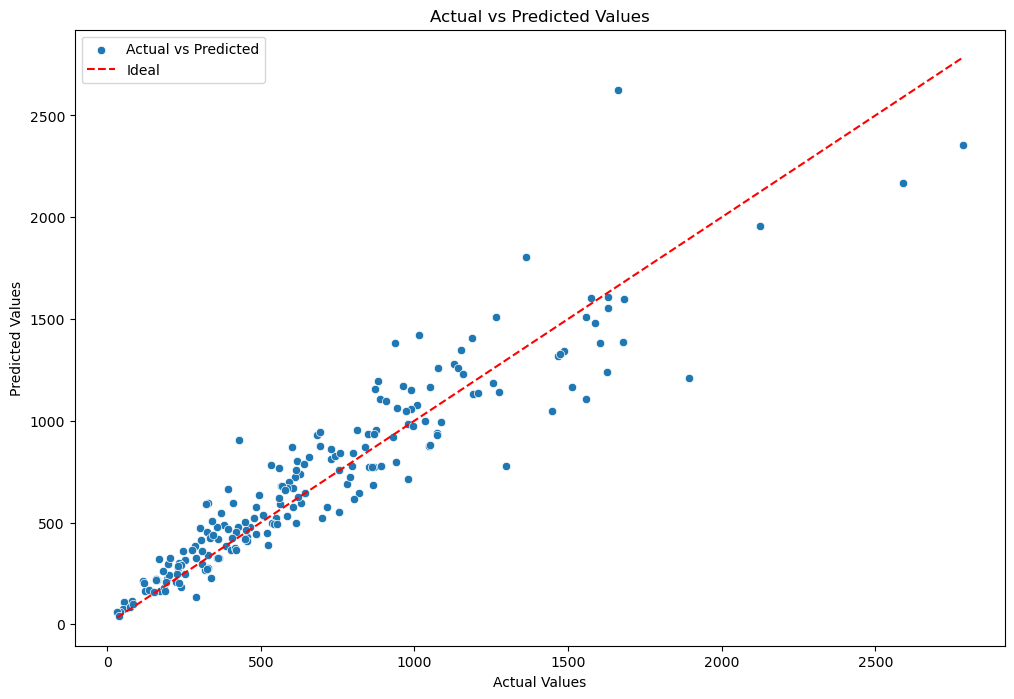

In [39]:


y_test = np.array(y_test) 
y_pred = np.array(y_pred) 

plt.figure(figsize=(12, 8))
sns.scatterplot(x=y_test.flatten(), y=y_pred, label="Actual vs Predicted")


plt.plot([min(y_test.flatten()), max(y_test.flatten())],
         [min(y_test.flatten()), max(y_test.flatten())],
         color="red", linestyle="--", label="Ideal")


plt.title("Actual vs Predicted Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.savefig("Actuals vs predictions.png")
plt.show()
